<a href="https://colab.research.google.com/github/ejrtks1020/Deep_Learning/blob/main/Learning_Rate_Scheduler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### LearningRateScheduler callback 객체에 입력될 scheduler 함수 선언. 
* epoch 증가 시 마다 LR이 exponentially decay 되도록 설정. 

In [1]:
import tensorflow as tf
import numpy as np

def scheduler_exp(epoch, lr):
    if epoch < 1:
        return lr
    else:
        return lr * np.exp(-1.0)

In [2]:
np.exp(-2.0)

0.1353352832366127

### LearningRateScheduler 로 Learning Rate를 epochs 시마다 변경하기
* LearningRateScheduler 객체 생성 시 인자로 scheduler 함수 입력하여 생성
* model.fit() callbacks인자로 LearningRateScheduler 객체 입력

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.callbacks import LearningRateScheduler


def scheduler_exp(epoch, lr):
    if epoch < 1:
        return lr
    else:
        return lr * np.exp(-1.0)
    
# 테스트용 임시 모델을 생성. 
model = Sequential([Dense(10)])
model.compile(optimizer=SGD(), loss='mse')
print('최초 learning rated:', round(model.optimizer.lr.numpy(), 5))

# LearningRateScheduler 객체에 인자로 scheduler_exp 함수 등록 
lr_scheduler = LearningRateScheduler(scheduler_exp, verbose=1)

history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
                    epochs=15, callbacks=[lr_scheduler], verbose=1)

최초 learning rated: 0.01

Epoch 00001: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/15
1/1 [==============================] - 2s 2s/step - loss: 2596.4526 - lr: 0.0100

Epoch 00002: LearningRateScheduler setting learning rate to 0.0036787943294869607.
Epoch 2/15
1/1 [==============================] - 0s 9ms/step - loss: 43802376.0000 - lr: 0.0037

Epoch 00003: LearningRateScheduler setting learning rate to 0.0013533527735202996.
Epoch 3/15
1/1 [==============================] - 0s 10ms/step - loss: 97577787392.0000 - lr: 0.0014

Epoch 00004: LearningRateScheduler setting learning rate to 0.0004978706704056293.
Epoch 4/15
1/1 [==============================] - 0s 11ms/step - loss: 27315172016128.0000 - lr: 4.9787e-04

Epoch 00005: LearningRateScheduler setting learning rate to 0.00018315638425888493.
Epoch 5/15
1/1 [==============================] - 0s 10ms/step - loss: 833189564121088.0000 - lr: 1.8316e-04

Epoch 00006: LearningRateScheduler setting learn

### scheduler_exp 함수 결과를 시각화

In [4]:
def scheduler_exp(epoch):
    initial_lr = 0.01
    if epoch < 1:
        return initial_lr
    else:
        return initial_lr * np.exp(-1.0)**epoch

    
model = Sequential([Dense(10)])
model.compile(optimizer=SGD(), loss='mse')
print('최초 learning rated:', round(model.optimizer.lr.numpy(), 5))

# LearningRateScheduler 객체에 인자로 scheduler_exp 함수 등록 
lr_scheduler = LearningRateScheduler(scheduler_exp, verbose=1)
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
                    epochs=15, callbacks=[lr_scheduler], verbose=1)

최초 learning rated: 0.01

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/15
1/1 [==============================] - 0s 267ms/step - loss: 7040.3350 - lr: 0.0100

Epoch 00002: LearningRateScheduler setting learning rate to 0.0036787944117144234.
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 118886312.0000 - lr: 0.0037

Epoch 00003: LearningRateScheduler setting learning rate to 0.0013533528323661271.
Epoch 3/15
1/1 [==============================] - 0s 8ms/step - loss: 264841019392.0000 - lr: 0.0014

Epoch 00004: LearningRateScheduler setting learning rate to 0.0004978706836786395.
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 74137552814080.0000 - lr: 4.9787e-04

Epoch 00005: LearningRateScheduler setting learning rate to 0.00018315638888734184.
Epoch 5/15
1/1 [==============================] - 0s 8ms/step - loss: 2261403897430016.0000 - lr: 1.8316e-04

Epoch 00006: LearningRateScheduler setting learning rate to 6

In [5]:
epochs_list = range(30)
lr_list = [ scheduler_exp(epoch) for epoch in epochs_list]

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_scheduler(epochs_list, lr_list, title=None):
    plt.figure(figsize=(6,4))
    plt.plot(epochs_list, lr_list)
    plt.xlabel('epochs')
    plt.ylabel('learning rate')
    plt.title(title)

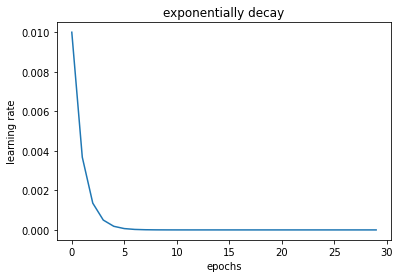

In [7]:
plot_scheduler(epochs_list, lr_list, 'exponentially decay')

### 또 다른 함수(step_decay)로 LearningRateScheduler 객체 생성하여 LR 조절. 

epoch: 0 lr: 0.1
epoch: 1 lr: 0.1
epoch: 2 lr: 0.1
epoch: 3 lr: 0.1
epoch: 4 lr: 0.1
epoch: 5 lr: 0.05
epoch: 6 lr: 0.05
epoch: 7 lr: 0.05
epoch: 8 lr: 0.05
epoch: 9 lr: 0.05
epoch: 10 lr: 0.025
epoch: 11 lr: 0.025
epoch: 12 lr: 0.025
epoch: 13 lr: 0.025
epoch: 14 lr: 0.025
epoch: 15 lr: 0.0125
epoch: 16 lr: 0.0125
epoch: 17 lr: 0.0125
epoch: 18 lr: 0.0125
epoch: 19 lr: 0.0125
epoch: 20 lr: 0.00625
epoch: 21 lr: 0.00625
epoch: 22 lr: 0.00625
epoch: 23 lr: 0.00625
epoch: 24 lr: 0.00625
epoch: 25 lr: 0.003125
epoch: 26 lr: 0.003125
epoch: 27 lr: 0.003125
epoch: 28 lr: 0.003125
epoch: 29 lr: 0.003125


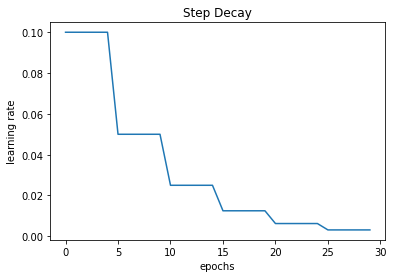

In [8]:
import tensorflow as tf

def step_decay(epoch):
    initial_lr = 0.1
    drop = 0.5
    epochs_drop = 5.0
    lr = initial_lr * (drop ** np.floor((epoch)/epochs_drop))
    print('epoch:',epoch,'lr:', lr)
    return lr

lr_list = [step_decay(epoch) for epoch  in epochs_list]
plot_scheduler(epochs_list, lr_list, title='Step Decay')

In [9]:
model = Sequential([Dense(10)])
model.compile(optimizer=SGD(), loss='mse')
print('최초 learning rated:', round(model.optimizer.lr.numpy(), 5))

lr_scheduler = LearningRateScheduler(step_decay, verbose=1)
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
                    epochs=15, callbacks=[lr_scheduler], verbose=1)

최초 learning rated: 0.01
epoch: 0 lr: 0.1

Epoch 00001: LearningRateScheduler setting learning rate to 0.1.
Epoch 1/15
1/1 [==============================] - 0s 271ms/step - loss: 2064.8408 - lr: 0.1000
epoch: 1 lr: 0.1

Epoch 00002: LearningRateScheduler setting learning rate to 0.1.
Epoch 2/15
1/1 [==============================] - 0s 11ms/step - loss: 3519965696.0000 - lr: 0.1000
epoch: 2 lr: 0.1

Epoch 00003: LearningRateScheduler setting learning rate to 0.1.
Epoch 3/15
1/1 [==============================] - 0s 8ms/step - loss: 6032930107293696.0000 - lr: 0.1000
epoch: 3 lr: 0.1

Epoch 00004: LearningRateScheduler setting learning rate to 0.1.
Epoch 4/15
1/1 [==============================] - 0s 9ms/step - loss: 10339943862969208668160.0000 - lr: 0.1000
epoch: 4 lr: 0.1

Epoch 00005: LearningRateScheduler setting learning rate to 0.1.
Epoch 5/15
1/1 [==============================] - 0s 10ms/step - loss: 17721810053149370227011616768.0000 - lr: 0.1000
epoch: 5 lr: 0.05

Epoch 00006

### Cosine Decay 적용하기
* Tensorflow 2.x은 Cosine Decay를 tf.keras.experimental.CosineDecay로 제공
* tf.keras.experimental.CosineDecay는 callback이 아니라 optimizer의 LearningRateSchedule 이며, model.compile()의 optimizer 인자의 learning_rate로 값 입력 부여
* initial_learning_rate는 최초 LR
* decay_steps는 감소 적용할 steps 
* alpha는 최소 LR


In [10]:
cos_decay = tf.keras.experimental.CosineDecay(initial_learning_rate=1e-2, decay_steps=30, alpha=1e-2)

In [11]:
type(cos_decay)

keras.optimizer_v2.learning_rate_schedule.CosineDecay

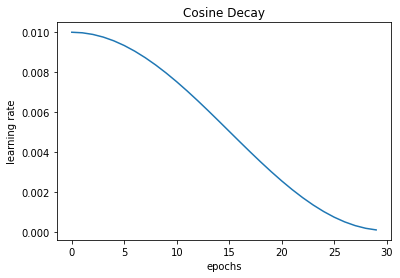

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_scheduler(epochs_list, lr_list, title=None):
    plt.figure(figsize=(6,4))
    plt.plot(epochs_list, lr_list)
    plt.xlabel('epochs')
    plt.ylabel('learning rate')
    plt.title(title)

cos_decay = tf.keras.experimental.CosineDecay(initial_learning_rate=1e-2, decay_steps=30, alpha=1e-2)

steps_list = range(0, 30)
lr_list = cos_decay(steps_list)

plot_scheduler(steps_list, lr_list, 'Cosine Decay')

### tf.keras.experimental.CosineDecay는 optimizer의 learning_rate 인자로 입력 되어야 함
* Callback이 아니므로 epochs시마다 변경되는 learning rate값을 알 수가 없음

In [13]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
# CosineDecay 객체는 optimizer의 learning_rate 인자로 입력되어야 함. 
model.compile(tf.keras.optimizers.Adam(learning_rate=cos_decay), loss='mse')

history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
                    epochs=15, verbose=1)

Epoch 1/15
1/1 [==============================] - 0s 379ms/step - loss: 5608.5674
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 4257.6709
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 3171.6331
Epoch 4/15
1/1 [==============================] - 0s 9ms/step - loss: 2322.9636
Epoch 5/15
1/1 [==============================] - 0s 13ms/step - loss: 1683.7041
Epoch 6/15
1/1 [==============================] - 0s 9ms/step - loss: 1224.0425
Epoch 7/15
1/1 [==============================] - 0s 10ms/step - loss: 908.8320
Epoch 8/15
1/1 [==============================] - 0s 16ms/step - loss: 698.7773
Epoch 9/15
1/1 [==============================] - 0s 8ms/step - loss: 556.7141
Epoch 10/15
1/1 [==============================] - 0s 10ms/step - loss: 455.3150
Epoch 11/15
1/1 [==============================] - 0s 10ms/step - loss: 378.4685
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 317.7974
Epoch 13/15
1/1 [===================

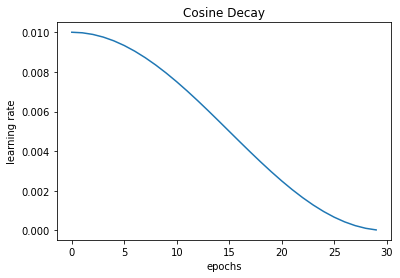

In [14]:
decay_steps = 30
alpha = 0.0
initial_learning_rate = 0.01

def decayed_learning_rate(step):
    step = min(step, decay_steps)
    cosine_decay = 0.5 * (1 + np.cos(np.pi * step / decay_steps))
    decayed = (1 - alpha) * cosine_decay + alpha
    return initial_learning_rate * decayed

steps_list = range(0, 30)
lr_list = [decayed_learning_rate(step) for step in steps_list]

plot_scheduler(steps_list, lr_list, 'Cosine Decay')

### Cosine Decay Restart(Cosine Annealing) 적용하기
* tf.keras.experimental.CosineDecayRestarts 객체를 이용하여 적용
* CosineDecay 객체와 마찬가지로 Callback이 아니므로 optimizer의 learning_rate인자로 입력 되어야 함. 
* initial_learning_rate는 최초 LR, first_decay_steps는 최초 decay step 수
* t_mul는 전체 steps수를 감안해서 얼마나 cosine annealing을 반복할 지 결정하는 계수. 1이면 전체 steps/first_decay_steps, 2이면 분모를 이전 값 대비 2배로 증가 시킴
* m_mul은 warm restart시 수행시마다 적용될 초기 learning rate
* alpha는 최소 learning rate로 설정 계수로 최소 lr은 initial learning rate * alpha로 설정됨. 

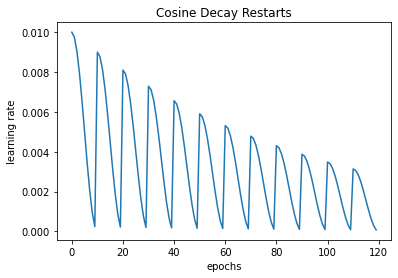

In [15]:
from tensorflow.keras.experimental import CosineDecayRestarts

cos_decay_restarts = CosineDecayRestarts(initial_learning_rate=0.01, first_decay_steps=10, t_mul=1, m_mul=0.9, alpha=0)
steps_list = range(0, 120)
lr_list = cos_decay_restarts(steps_list)

plot_scheduler(steps_list, lr_list, 'Cosine Decay Restarts')

In [16]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
# CosineDecay 객체는 optimizer의 learning_rate 인자로 입력되어야 함. 
model.compile(tf.keras.optimizers.Adam(learning_rate=cos_decay_restarts), loss='mse')

history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
                    epochs=15, verbose=1)

Epoch 1/15
1/1 [==============================] - 0s 450ms/step - loss: 5533.9468
Epoch 2/15
1/1 [==============================] - 0s 11ms/step - loss: 4413.5566
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 3533.1016
Epoch 4/15
1/1 [==============================] - 0s 12ms/step - loss: 2880.6104
Epoch 5/15
1/1 [==============================] - 0s 9ms/step - loss: 2392.5728
Epoch 6/15
1/1 [==============================] - 0s 8ms/step - loss: 2027.6049
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 1768.4551
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 1600.0779
Epoch 9/15
1/1 [==============================] - 0s 8ms/step - loss: 1504.1786
Epoch 10/15
1/1 [==============================] - 0s 9ms/step - loss: 1460.9431
Epoch 11/15
1/1 [==============================] - 0s 7ms/step - loss: 1449.9736
Epoch 12/15
1/1 [==============================] - 0s 9ms/step - loss: 1087.7811
Epoch 13/15
1/1 [================

### Ramp Up and Step Down Decay
* Ramp up으로 warm up 수행 후 Step 형식으로 Decay 하는 방식. 
* Kaggle의 Chris Deotte 가 제안하여 사용됨. 

In [ ]:
LR_START = 1e-5
LR_MAX = 1e-2
LR_RAMPUP_EPOCHS = 5
LR_SUSTAIN_EPOCHS = 10
LR_STEP_DECAY = 0.75

def lrfn(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        lr = ((LR_MAX - LR_START) / LR_RAMPUP_EPOCHS) * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        lr = LR_MAX * LR_STEP_DECAY**((epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS)//2)
    #print('epoch:', epoch, 'lr:', lr)
    return lr

lr_list = [lrfn(epoch) for epoch  in epochs_list]

plot_scheduler(epochs_list, lr_list, title='WarmUp')

### 아래와 같이 내포 함수로 생성하는 것을 권장. 

In [ ]:
def lrfn(epoch):
    LR_START = 1e-5
    LR_MAX = 1e-2
    LR_RAMPUP_EPOCHS = 3
    LR_SUSTAIN_EPOCHS = 3
    LR_STEP_DECAY = 0.75
    
    def calc_fn(epoch):
        if epoch < LR_RAMPUP_EPOCHS:
            lr = ((LR_MAX - LR_START) / LR_RAMPUP_EPOCHS) * epoch + LR_START
        elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
            lr = LR_MAX
        else:
            lr = LR_MAX * LR_STEP_DECAY**((epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS)//2)
        
        print('epoch:', epoch, 'lr:', lr)
        
        return lr
    
    # 반드시 내포 함수인 calc_fn(epoch)를 호출해야함. 
    return calc_fn(epoch)

In [ ]:
import tensorflow as tf
import numpy as np


model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
model.compile(tf.keras.optimizers.SGD(), loss='mse')

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lrfn)
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
                    epochs=30, callbacks=[lr_scheduler], verbose=1)


### Cosine Decay를 Callback 으로 구현. 

In [ ]:
from collections.abc import Iterable
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import control_flow_ops
from tensorflow.python.framework import constant_op
import math


class CosineDecayCB(tf.keras.callbacks.Callback):
    def __init__(self, initial_learning_rate, decay_steps):
        super(CosineDecayCB, self).__init__()
        self.initial_learning_rate = initial_learning_rate
        self.decay_steps = decay_steps
        self.batch_step = 0
        self.calc_lr = 0.0

    def on_train_batch_begin(self, step, logs=None):
        if not hasattr(self.model.optimizer, "lr"):
            raise ValueError('Optimizer must have a "lr" attribute.')
        # optimizer의 현재 learning rate를 가져옴. 
        lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
        # schedule 함수에 batch_step과 lr을 입력하여 step에 따른 lr 계산. 
        scheduled_lr = self.schedule(self.batch_step, lr)
        # 계산된 scheduled_lr을 optimizer의 lr로 입력. 
        tf.keras.backend.set_value(self.model.optimizer.lr, scheduled_lr)
        self.batch_step += 1
        self.calc_lr = scheduled_lr
        
    def on_epoch_end(self, epoch, logs=None):
        print('learning rate:', self.calc_lr)
        
    # cosine decay learning rate를 step 별로 계산. 
    def schedule(self, step, lr):
        def decayed_learning_rate(step, lr):
            step = min(step, self.decay_steps)
            cosine_decay = 0.5 * (1 + np.cos(np.pi * step / self.decay_steps))
            decayed = (1 - alpha) * cosine_decay + alpha
            return lr * decayed
        
        return decayed_learning_rate(step, lr)
        

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
model.compile(tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')

cosine_scheduler = CosineDecayCB(0.01, 100)
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)
#lr_monitor = LearningRateMonitor()
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
                    epochs=30, callbacks=[cosine_scheduler], verbose=1)

### Cosine Decay Restart 를 Callback으로 구현. 
* https://gist.github.com/jeremyjordan/5a222e04bb78c242f5763ad40626c452

In [ ]:
from tensorflow.keras import backend as K

class LearningRateMonitor(Callback):
    # start of training
    def on_train_begin(self, logs={}):
        self.lrates = list()

    # end of each training epoch
    def on_epoch_end(self, epoch, logs={}):
        # get and store the learning rate
        optimizer = self.model.optimizer
        lrate = float(K.get_value(self.model.optimizer.lr))
        print('learning rate:', lrate)
        self.lrates.append(lrate)

In [ ]:
# https://gist.github.com/jeremyjordan/5a222e04bb78c242f5763ad40626c452

from collections.abc import Iterable
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import control_flow_ops
from tensorflow.python.framework import constant_op
import math


class CosineDecayRestarts(tf.keras.callbacks.Callback):
    def __init__(self, initial_learning_rate, first_decay_steps, alpha=0.0, t_mul=2.0, m_mul=1.0):
        super(CosineDecayRestarts, self).__init__()
        self.initial_learning_rate = initial_learning_rate
        self.first_decay_steps = first_decay_steps
        self.alpha = alpha
        self.t_mul = t_mul
        self.m_mul = m_mul
        self.batch_step = 0

    def on_train_batch_begin(self, step, logs=None):
        if not hasattr(self.model.optimizer, "lr"):
            raise ValueError('Optimizer must have a "lr" attribute.')
        # Get the current learning rate from model's optimizer.
        lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
        # Call schedule function to get the scheduled learning rate.
        scheduled_lr = self.schedule(self.batch_step, lr)
        # Set the value back to the optimizer before this epoch starts
        tf.keras.backend.set_value(self.model.optimizer.lr, scheduled_lr)
        self.batch_step += 1

    def schedule(self, step, lr):
        def compute_step(completed_fraction, geometric=False):
            """Helper for `cond` operation."""
            if geometric:
                i_restart = math_ops.floor(
                  math_ops.log(1.0 - completed_fraction * (1.0 - self.t_mul)) /
                  math_ops.log(self.t_mul))

                sum_r = (1.0 - self.t_mul**i_restart) / (1.0 - self.t_mul)
                completed_fraction = (completed_fraction - sum_r) / self.t_mul**i_restart

            else:
                i_restart = math_ops.floor(completed_fraction)
                completed_fraction -= i_restart

            return i_restart, completed_fraction

        completed_fraction = step / self.first_decay_steps

        i_restart, completed_fraction = control_flow_ops.cond(
          math_ops.equal(self.t_mul, 1.0),
          lambda: compute_step(completed_fraction, geometric=False),
          lambda: compute_step(completed_fraction, geometric=True))

        m_fac = self.m_mul**i_restart
        cosine_decayed = 0.5 * m_fac * (1.0 + math_ops.cos(
          constant_op.constant(math.pi) * completed_fraction))
        decayed = (1 - self.alpha) * cosine_decayed + self.alpha

        return math_ops.multiply(self.initial_learning_rate, decayed)

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
model.compile(tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')

cosine_scheduler = CosineDecayRestarts(0.01, 100)
lr_monitor = LearningRateMonitor()
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
                    epochs=15, callbacks=[cosine_scheduler, lr_monitor], verbose=1)